In [4]:
import pandas as pd
import numpy as np

df = pd.read_excel("data_Poisson.xlsx")

print(df.head())
print(df.shape)

   obs
0    5
1    4
2    4
3    5
4    5
(100, 1)


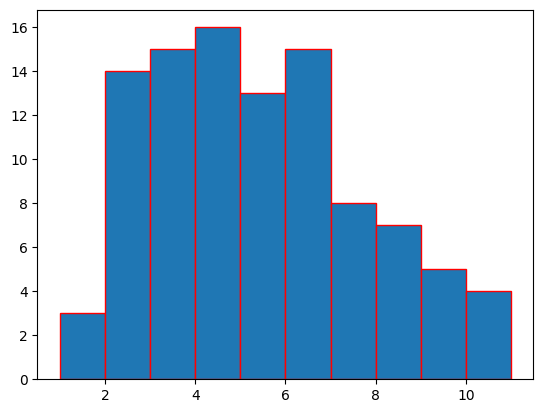

In [5]:
#Visualize the data as a histogram
import matplotlib.pyplot as plt
plt.hist(df['obs'], edgecolor = "red")
plt.show()

In [6]:
#getting descriptive statistics
df.describe()

,obs
count,100.000000
mean,4.940000
std,2.381834
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [7]:
#Some additional descriptive statistics
stats_labels = ['Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))


{('Skew Observed', np.float64(0.51)), ('Variance Observed', np.float64(5.67)), ('Kurt Observed', np.float64(-0.38))}


In [8]:
#Importing the required statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2

#New
from scipy.stats import poisson

In [ ]:
# NULL HYPOTHESIS: The given data follows Poisson distribution.
# ALTERNATE HYPOTHESIS: The given data does not follow Poisson distribution

In [12]:
#Step-1 in CHi-Square GOF: Create Bins
df['Bins'] = pd.cut(df['obs'], bins=10)
print(df)

    obs         Bins
0     5   (4.0, 5.0]
1     4   (3.0, 4.0]
2     4   (3.0, 4.0]
3     5   (4.0, 5.0]
4     5   (4.0, 5.0]
..  ...          ...
95    6   (5.0, 6.0]
96    8   (7.0, 8.0]
97    6   (5.0, 6.0]
98    2  (0.99, 2.0]
99    3   (2.0, 3.0]

[100 rows x 2 columns]


In [13]:
#Step-2 in CHi-Square GOF: Count Number of Observations in Each Bin
df_2 = pd.DataFrame()
df_2 ["Observed Frequency"] = (df.groupby('Bins').count())
df_2

C:\Users\kethi\AppData\Local\Temp\ipykernel_57532\379125594.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2 ["Observed Frequency"] = (df.groupby('Bins').count())


,Observed Frequency
Bins,
"(0.99, 2.0]",17
"(2.0, 3.0]",15
"(3.0, 4.0]",16
"(4.0, 5.0]",13
"(5.0, 6.0]",15
"(6.0, 7.0]",8
"(7.0, 8.0]",7
"(8.0, 9.0]",5
"(9.0, 10.0]",2


In [14]:
# I cannot use the above method of forming bins, as Poisson Distribution is "Discrete". So, I adopt the following method. 

#Step-2 in CHi-Square GOF: Count Number of Observations in Each Bin

In [15]:
#Step-2A: Creating a new data frame
grouped_df = pd.DataFrame()
print(grouped_df)


Empty DataFrame
Columns: []
Index: []


In [16]:
#Step-2B: Creating buckets based on the values in the sample 
grouped_df['Observed Frequency']= df.groupby('obs')['obs'].count()
print(grouped_df)

     Observed Frequency
obs                    
1                     3
2                    14
3                    15
4                    16
5                    13
6                    15
7                     8
8                     7
9                     5
10                    2
11                    2


In [17]:
#Step-3: Determining the Expected Frequency in Each Bin
#Step-3A: Determined the Poisson PMF for each bucket
grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index, mu=df['obs'].mean())
print(grouped_df)

     Observed Frequency  POISSON_PMF
obs                                 
1                     3     0.035344
2                    14     0.087299
3                    15     0.143752
4                    16     0.177534
5                    13     0.175404
6                    15     0.144416
7                     8     0.101916
8                     7     0.062933
9                     5     0.034543
10                    2     0.017064
11                    2     0.007663


In [18]:
#Step-3B: Determined the expected frequency in each bucket
grouped_df['Expected Frequency'] = grouped_df['POISSON_PMF']*len(df)
print(grouped_df)

     Observed Frequency  POISSON_PMF  Expected Frequency
obs                                                     
1                     3     0.035344            3.534372
2                    14     0.087299            8.729898
3                    15     0.143752           14.375232
4                    16     0.177534           17.753411
5                    13     0.175404           17.540370
6                    15     0.144416           14.441572
7                     8     0.101916           10.191623
8                     7     0.062933            6.293327
9                     5     0.034543            3.454337
10                    2     0.017064            1.706443
11                    2     0.007663            0.766348


In [22]:
#Step-4A in CHi-Square GOF: Determine the Test Statistics and P-Value 
chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'], ddof=1)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.012279627592810389

In [20]:
#The above error occures because of the mismatch between the number (count) of values in the "Observed Frequency" and "Expected Frequency"
print(grouped_df['Observed Frequency'].sum())
print(grouped_df['Expected Frequency'].sum())

100
98.78693324867051


In [21]:
# To fix this, you need to apply the principle of probability (sum of probabilities should add up to 1).
print(grouped_df['POISSON_PMF'].sum())

# In our data, the probability for POISSON PMF does not add up to 1.

0.9878693324867053
